# Phase 2: Classification Prediction with Imbalanced Target

# Mary Donovan Martello

**Phase 1 of the credit card default project involved testing five binary classification models for predicting credit card defaults.  Phase 1 can be found:** [here](https://github.com/MaryDonovanMartello/Credit-Card-Default-Prediction)

**Phase 2 of the credit card default project includes (1) employing methodologies other than Principal Component Analysis to address multicollinearity and feature selection in an effort to be able to analyze individual factors that are significant for defaults, (2) testing multiple approaches to addressing an imbalanced target variable in a binary classification model, and (3) implementing deployment models to make actual predictions and convert the logistic regression coefficients to a risk score that can be used in making lending decisions.**

## Part 8:  Deployment Models

In [2]:
import pandas as pd
from pandas import read_csv
import numpy as np
import joblib

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency

#stop unnecessary warnings from printing to the screen
import warnings
warnings.simplefilter('ignore')


In [4]:
ADASYN = joblib.load('ADASYNmodel.sav')

In [5]:
type(ADASYN)

sklearn.model_selection._search.GridSearchCV

In [3]:
df1 = pd.read_csv('logDefaultRev1.csv')
df2 = pd.read_csv('logDefaultRev2.csv')

In [7]:
df1.columns

Index(['default', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'LIMIT_BAL',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'MONTHS_LATE'],
      dtype='object')

## Prediction Model

**Create feature for each categorical category**

In [34]:
df1['SEX_Dummy'] = 0
df1['EDUCATION_Dummy1'] = 0
df1['EDUCATION_Dummy2'] = 0
df1['EDUCATION_Dummy3'] = 0
df1['EDUCATION_Dummy4'] = 0
df1['EDUCATION_Dummy5'] = 0
df1['EDUCATION_Dummy6'] = 0
df1['MARRIAGE_Dummy1'] = 0
df1['MARRIAGE_Dummy2'] = 0
df1['MARRIAGE_Dummy3'] = 0

In [35]:
df1.columns

Index(['default', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'LIMIT_BAL',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'MONTHS_LATE', 'SEX_Dummy', 'EDUCATION_Dummy1',
       'EDUCATION_Dummy2', 'EDUCATION_Dummy3', 'EDUCATION_Dummy4',
       'EDUCATION_Dummy5', 'EDUCATION_Dummy6', 'MARRIAGE_Dummy1',
       'MARRIAGE_Dummy2', 'MARRIAGE_Dummy3'],
      dtype='object')

In [36]:
# Reorder the colomuns
df1 = df1[['default', 'SEX', 'SEX_Dummy', 'EDUCATION_Dummy1', 'EDUCATION', 'EDUCATION_Dummy2', 'EDUCATION_Dummy3', 
           'EDUCATION_Dummy4', 'EDUCATION_Dummy5', 'EDUCATION_Dummy6', 'MARRIAGE_Dummy1', 'MARRIAGE', 'MARRIAGE_Dummy2', 'MARRIAGE_Dummy3',
           'AGE', 'LIMIT_BAL',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'MONTHS_LATE']]

In [37]:
df1.columns

Index(['default', 'SEX', 'SEX_Dummy', 'EDUCATION_Dummy1', 'EDUCATION',
       'EDUCATION_Dummy2', 'EDUCATION_Dummy3', 'EDUCATION_Dummy4',
       'EDUCATION_Dummy5', 'EDUCATION_Dummy6', 'MARRIAGE_Dummy1', 'MARRIAGE',
       'MARRIAGE_Dummy2', 'MARRIAGE_Dummy3', 'AGE', 'LIMIT_BAL', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'MONTHS_LATE'],
      dtype='object')

**Create a dataframe for new data**

In [38]:
# create a new dataframe that is indexed like the training dataframe
newdata = pd.DataFrame().reindex_like(df1)
# replace Nan with 0 for all values in the new dataframe
newdata.fillna(value=0, inplace=True)
# delete the variable to be predicted; newdata dataframe are the input features
del newdata['default']
# reduce dataframe to just the first row
newdata = newdata.iloc[[1]]

In [39]:
newdata.columns

Index(['SEX', 'SEX_Dummy', 'EDUCATION_Dummy1', 'EDUCATION', 'EDUCATION_Dummy2',
       'EDUCATION_Dummy3', 'EDUCATION_Dummy4', 'EDUCATION_Dummy5',
       'EDUCATION_Dummy6', 'MARRIAGE_Dummy1', 'MARRIAGE', 'MARRIAGE_Dummy2',
       'MARRIAGE_Dummy3', 'AGE', 'LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'MONTHS_LATE'],
      dtype='object')

In [40]:
newdata.head()

,SEX,SEX_Dummy,EDUCATION_Dummy1,EDUCATION,EDUCATION_Dummy2,EDUCATION_Dummy3,EDUCATION_Dummy4,EDUCATION_Dummy5,EDUCATION_Dummy6,MARRIAGE_Dummy1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MONTHS_LATE
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
newdata.shape

(1, 28)

**Insert the new data**

In [43]:
# insert the account holder information

newdata['SEX'] = 1
newdata['SEX_Dummy'] = 0
newdata['EDUCATION_Dummy1'] = 0
newdata['EDUCATION'] = 1
newdata['EDUCATION_Dummy2'] = 0
newdata['EDUCATION_Dummy3'] = 0
newdata['EDUCATION_Dummy4'] = 0
newdata['EDUCATION_Dummy5'] = 0
newdata['EDUCATION_Dummy6'] = 0
newdata['MARRIAGE_Dummy1'] = 0
newdata['MARRIAGE_Dummy2'] = 0
newdata['MARRIAGE'] = 1
newdata['MARRIAGE_Dummy3'] = 0
newdata['AGE'] = 29
newdata['LIMIT_BAL'] = 50000
newdata['BILL_AMT1'] = 25000
newdata['BILL_AMT2'] = 24800
newdata['BILL_AMT3'] = 26600
newdata['BILL_AMT4'] = 25900
newdata['BILL_AMT5'] = 27700
newdata['BILL_AMT6'] = 28300
newdata['PAY_AMT1'] = 0
newdata['PAY_AMT2'] = 2700
newdata['PAY_AMT3'] = 0
newdata['PAY_AMT4'] = 2225
newdata['PAY_AMT5'] = 1200
newdata['PAY_AMT6'] = 0
newdata['MONTHS_LATE'] = 6

In [44]:
newdata.head()

,SEX,SEX_Dummy,EDUCATION_Dummy1,EDUCATION,EDUCATION_Dummy2,EDUCATION_Dummy3,EDUCATION_Dummy4,EDUCATION_Dummy5,EDUCATION_Dummy6,MARRIAGE_Dummy1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MONTHS_LATE
1,1,0,0,1,0,0,0,0,0,0,...,25900,27700,28300,0,2700,0,2225,1200,0,6


**Make the prediction.**

In [50]:
prediction = ADASYN.predict(newdata)


In [46]:
print(prediction)

[1]


## Risk Score Model

### Source:  Mumtaz, A. (2020, August 13). How to Develop a Credit Risk Model and Scorecard. Retrieved from Towards Data Science: https://towardsdatascience.com/how-to-develop-a-credit-risk-model-and-scorecard-91335fc01f03

**Load data and prepare dataframe**

In [4]:
df2.columns

Index(['default', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'LIMIT_BAL',
       'MONTHS_LATE', 'PAYMENT_RATIO'],
      dtype='object')

In [5]:
df2.head()

,default,SEX,EDUCATION,MARRIAGE,AGE,LIMIT_BAL,MONTHS_LATE,PAYMENT_RATIO
0,1,1,1,2,3.401197,10.819798,1.94591,0.038110
1,1,1,2,2,3.401197,12.676079,1.94591,0.037397
2,1,1,1,1,3.988984,12.206078,1.94591,0.037338
3,0,2,2,2,3.295837,11.002117,1.94591,0.038758
4,0,1,2,1,3.737670,12.542548,1.94591,0.046396


In [6]:
df2['default'].value_counts()

0    22811
1     6319
Name: default, dtype: int64

**Need to flip the 1 and 0's for the target as functions assume 1 is a good result.**

In [7]:

df2['revDefault'] = df2.apply(lambda x: (1 if x['default']==0 else 0), axis=1)

In [8]:
df2.head()

,default,SEX,EDUCATION,MARRIAGE,AGE,LIMIT_BAL,MONTHS_LATE,PAYMENT_RATIO,revDefault
0,1,1,1,2,3.401197,10.819798,1.94591,0.038110,0
1,1,1,2,2,3.401197,12.676079,1.94591,0.037397,0
2,1,1,1,1,3.988984,12.206078,1.94591,0.037338,0
3,0,2,2,2,3.295837,11.002117,1.94591,0.038758,1
4,0,1,2,1,3.737670,12.542548,1.94591,0.046396,1


In [9]:
df2['revDefault'].value_counts()

1    22811
0     6319
Name: revDefault, dtype: int64

In [10]:
# separate into input and output columns (X variable for features and y for target variables)

X = df2.drop(['default', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'revDefault'],  axis = 1)
y = df2['revDefault']

In [11]:
# separate data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=1, stratify = y)

## WoE Binning/Feature Engineering

Analyze numerical features based on their binned WoEs and IVs and then combine some of these binned categories together through a custom Python Class with fit_transform method.

In [12]:
# Create copies of the 4 training sets to be preprocessed using WoE
X_train_prepr = X_train.copy()
y_train_prepr = y_train.copy()
X_test_prepr = X_test.copy()
y_test_prepr = y_test.copy()

### Analyze WoEs and IVs of numeric features

In [13]:
# Define a function to calculate WoE of continuous variables. The function takes 3 arguments: a dataframe (X_train_prepr), 
# a string (column name), and a dataframe (y_train_prepr).
# The function returns a dataframe as a result.
 
def woe_ordered_continuous(df, continuous_variabe_name, y_df):
    df = pd.concat([df[continuous_variabe_name], y_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE']) # this only for categorical vars
    #df = df.reset_index(drop = True) # this only for categorical vars
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [14]:
# set the default style of the graphs to the seaborn style. 
sns.set()
# Function for plotting WoE across categories that takes 2 arguments: a dataframe and a number.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

**MONTHS_LATE**

In [15]:
df_temp = woe_ordered_continuous(X_train_prepr, 'MONTHS_LATE', y_train_prepr)
df_temp

,MONTHS_LATE,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.000000,15680,0.887564,0.672846,13917.0,1763.0,0.762617,0.348764,0.782362,NaN,NaN,0.965219
1,0.693147,1290,0.820155,0.055355,1058.0,232.0,0.057976,0.045895,0.233666,0.067409,0.548696,0.965219
2,1.098612,2423,0.628972,0.103974,1524.0,899.0,0.083511,0.177844,-0.755922,0.191183,0.989588,0.965219
3,1.386294,1189,0.624054,0.051021,742.0,447.0,0.040660,0.088427,-0.776942,0.004919,0.021020,0.965219
4,1.609438,947,0.418163,0.040637,396.0,551.0,0.021700,0.109001,-1.614053,0.205891,0.837111,0.965219
5,1.791759,547,0.444241,0.023472,243.0,304.0,0.013316,0.060138,-1.507699,0.026079,0.106354,0.965219
6,1.945910,1228,0.300489,0.052695,369.0,859.0,0.020220,0.169931,-2.128705,0.143753,0.621006,0.965219


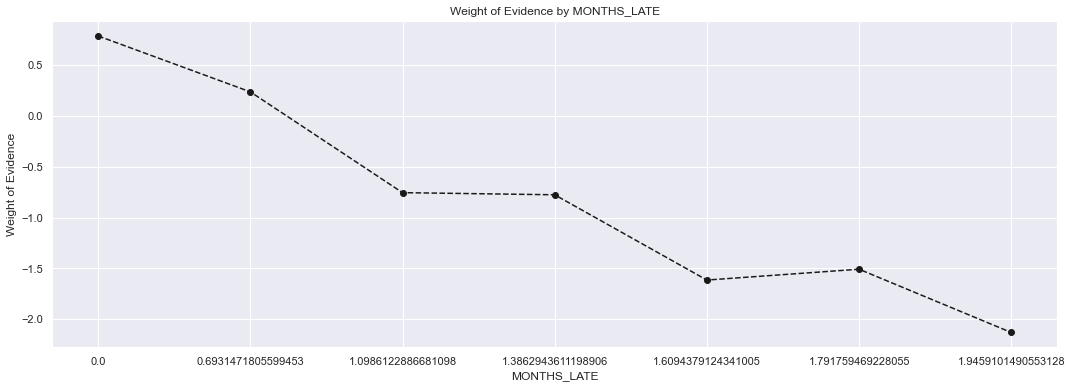

In [16]:
plot_by_woe(df_temp)

**PAYMENT_RATIO**

In [17]:


# fine-classing using the 'cut' method, given the large number of unique values
X_train_prepr['PAYMENT_RATIO'] = pd.cut(X_train_prepr['PAYMENT_RATIO'], 7)
# Process 'int_rate_factor' column through woe_ordered_continuous and plot_by_woe functions
df_temp = woe_ordered_continuous(X_train_prepr, 'PAYMENT_RATIO', y_train_prepr)
df_temp

,PAYMENT_RATIO,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.00668, 0.955]",22677,0.781453,0.973095,17721.0,4956.0,0.971067,0.980415,-0.009581,NaN,NaN,0.004242
1,"(0.955, 1.909]",489,0.848671,0.020984,415.0,74.0,0.022741,0.014639,0.440481,0.067218,0.450062,0.004242
2,"(1.909, 2.864]",92,0.836957,0.003948,77.0,15.0,0.004219,0.002967,0.352023,0.011714,0.088458,0.004242
3,"(2.864, 3.818]",27,0.814815,0.001159,22.0,5.0,0.001206,0.000989,0.197872,0.022142,0.154151,0.004242
4,"(3.818, 4.773]",10,0.700000,0.000429,7.0,3.0,0.000384,0.000593,-0.436435,0.114815,0.634307,0.004242
5,"(4.773, 5.728]",5,0.800000,0.000215,4.0,1.0,0.000219,0.000198,0.102562,0.100000,0.538997,0.004242
6,"(5.728, 6.682]",4,0.750000,0.000172,3.0,1.0,0.000164,0.000198,-0.185120,0.050000,0.287682,0.004242


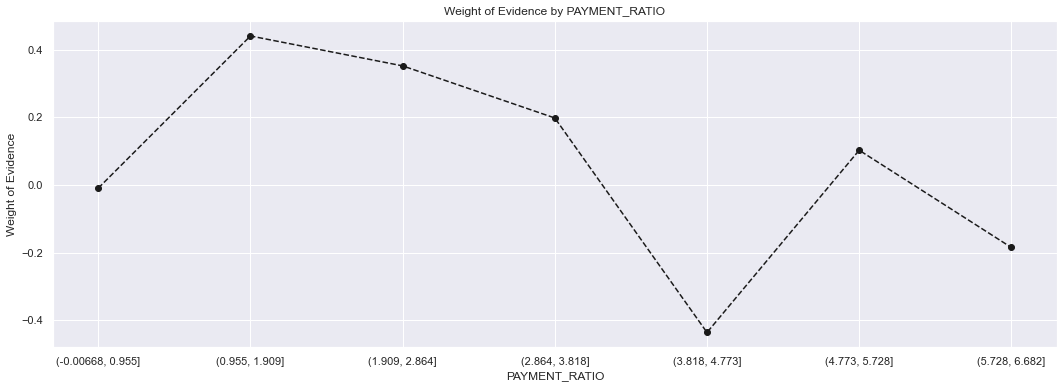

In [18]:
plot_by_woe(df_temp)

In [18]:
X_train.shape

(23304, 3)

**LIMIT_BALANCE**

In [19]:
# fine-classing using the 'cut' method, given the large number of unique values
X_train_prepr['LIMIT_BAL'] = pd.cut(X_train_prepr['LIMIT_BAL'], 5)
# Process 'int_rate_factor' column through woe_ordered_continuous and plot_by_woe functions
df_temp = woe_ordered_continuous(X_train_prepr, 'LIMIT_BAL', y_train_prepr)
df_temp

,LIMIT_BAL,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(9.206, 10.131]",1955,0.632737,0.083891,1237.0,718.0,0.067785,0.142038,-0.739758,NaN,NaN,0.199189
1,"(10.131, 11.052]",4790,0.701879,0.205544,3362.0,1428.0,0.184229,0.282493,-0.427471,0.069142,0.312286,0.199189
2,"(11.052, 11.973]",6144,0.772135,0.263646,4744.0,1400.0,0.259959,0.276954,-0.063324,0.070257,0.364147,0.199189
3,"(11.973, 12.894]",8801,0.847972,0.377660,7463.0,1338.0,0.408954,0.264688,0.435049,0.075836,0.498373,0.199189
4,"(12.894, 13.816]",1614,0.894052,0.069258,1443.0,171.0,0.079073,0.033828,0.849084,0.046080,0.414034,0.199189


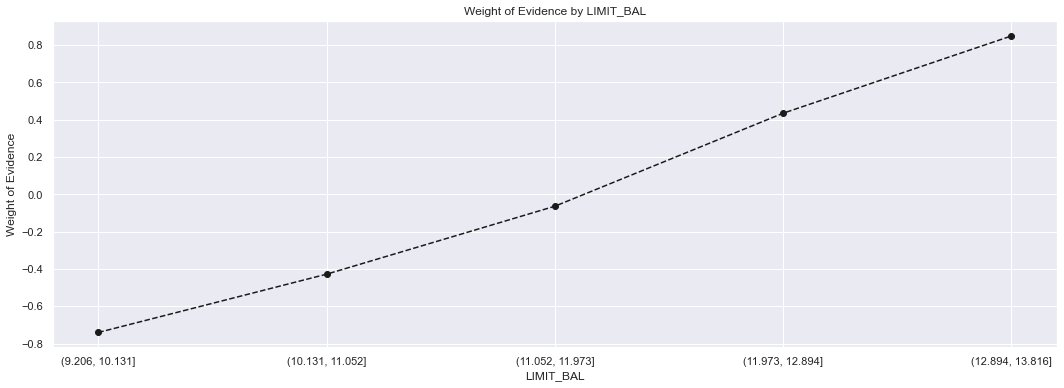

In [20]:
plot_by_woe(df_temp)

In [21]:
# create a list of all the reference categories, i.e. one category from each of the global features
ref_categories = ['MONTHS_LATE:>1.791759', 'PAYMENT_RATIO:>0.954', 'LIMIT_BAL:>12.894']


In [22]:
# This custom class will create new categorical dummy features based on the cut-off points that weRE manually identified
# based on the WoE plots and IV above.
# Given the way it is structured, this class also allows a fit_transform method to be implemented on it, thereby allowing 
# use in a scikit-learn Pipeline 

class WoE_Binning(BaseEstimator, TransformerMixin):
    def __init__(self, X): # no *args or *kargs
        self.X = X
    def fit(self, X, y = None):
        return self #nothing else to do
    def transform(self, X):
        X_new = X.loc[:, 'MONTHS_LATE': 'MONTHS_LATE']        
        X_new['MONTHS_LATE:<0.693147'] = np.where((X['MONTHS_LATE'] <= 0.693147), 1, 0)
        X_new['MONTHS_LATE:0.693147-1.098612'] = np.where((X['MONTHS_LATE'] > 0.693147) & (X['MONTHS_LATE'] <= 1.098612), 1, 0)
        X_new['MONTHS_LATE:1.098612-1.609438'] = np.where((X['MONTHS_LATE'] > 1.098612) & (X['MONTHS_LATE'] <= 1.609438), 1, 0)
        X_new['MONTHS_LATE:1.609438-1.791759'] = np.where((X['MONTHS_LATE'] > 1.609438) & (X['MONTHS_LATE'] <= 1.791759), 1, 0)
        X_new['MONTHS_LATE:>1.791759'] = np.where((X['MONTHS_LATE'] > 1.791759), 1, 0)
        X_new['PAYMENT_RATIO:<0.955'] = np.where((X['PAYMENT_RATIO'] <= 0.955), 1, 0)
        X_new['PAYMENT_RATIO:>0.954'] = np.where((X['PAYMENT_RATIO'] > 0.954), 1, 0)
        X_new['LIMIT_BAL:<10.131'] = np.where((X['LIMIT_BAL'] <= 10.131), 1, 0)
        X_new['LIMIT_BAL:10.131-11.052'] = np.where((X['LIMIT_BAL'] > 10.131) & (X['LIMIT_BAL'] <= 11.052), 1, 0)
        X_new['LIMIT_BAL:11.052-11.973'] = np.where((X['LIMIT_BAL'] > 11.052) & (X['LIMIT_BAL'] <= 11.973), 1, 0)
        X_new['LIMIT_BAL:11.973-12.894'] = np.where((X['LIMIT_BAL'] > 11.973) & (X['LIMIT_BAL'] <= 12.894), 1, 0)
        X_new['LIMIT_BAL:>12.894'] = np.where((X['LIMIT_BAL'] > 11.973), 1, 0)
        X_new.drop(columns =ref_categories, inplace = True)
        return X_new

## Model

In [23]:
# reconfirm shape of the 4 datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(23304, 3)
(23304,)
(5826, 3)
(5826,)


In [24]:
# define modeling pipeline
reg = LogisticRegression(max_iter=1000, class_weight = 'balanced', C = 464.158883, penalty = 'l1')
woe_transform = WoE_Binning(X)
pipeline = Pipeline(steps=[('woe', woe_transform), ('model', reg)])

# define cross-validation criteria. RepeatedStratifiedKFold automatially takes care of the class imbalance while splitting
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# fit and evaluate the logistic regression pipeline with cross-validation as defined in cv
scores = cross_val_score(pipeline, X_train, y_train, scoring = 'roc_auc', cv = cv)
AUROC = np.mean(scores)
GINI = AUROC * 2 - 1

# print the mean AUROC score and Gini
print('Mean AUROC: %.4f' % (AUROC))
print('Gini: %.4f' % (GINI))

Mean AUROC: 0.7572
Gini: 0.5144


In [25]:
# fit the pipeline on the whole training set
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('woe', WoE_Binning(X=       LIMIT_BAL  MONTHS_LATE  PAYMENT_RATIO
0      10.819798     1.945910       0.038110
1      12.676079     1.945910       0.037397
2      12.206078     1.945910       0.037338
3      11.002117     1.945910       0.038758
4      12.542548     1.945910       0.046396
....penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])

## Scorecard Development

In [26]:
# first create a transformed training set through our WoE_Binning custom class
X_train_woe_transformed = woe_transform.fit_transform(X_train)
# Store the column names in X_train as a list
feature_name = X_train_woe_transformed.columns.values
# Create a summary table of our logistic regression model
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Create a new column in the dataframe, called 'Coefficients', with row values the transposed coefficients from the 'LogisticRegression' model
summary_table['Coefficients'] = np.transpose(pipeline.named_steps['model'].coef_)
# Increase the index of every row of the dataframe with 1 to store our model intercept in 1st row
summary_table.index = summary_table.index + 1
# Assign our model intercept to this new row
summary_table.loc[0] = ['Intercept', pipeline.named_steps['model'].intercept_[0]]
# Sort the dataframe by index
summary_table.sort_index(inplace = True)
summary_table

,Feature name,Coefficients
0,Intercept,1.088768
1,MONTHS_LATE,-1.351952
2,MONTHS_LATE:<0.693147,0.004906
3,MONTHS_LATE:0.693147-1.098612,0.392497
4,MONTHS_LATE:1.098612-1.609438,0.112620
5,MONTHS_LATE:1.609438-1.791759,0.000000
6,PAYMENT_RATIO:<0.955,0.120415
7,LIMIT_BAL:<10.131,-0.887972
8,LIMIT_BAL:10.131-11.052,-0.700523
9,LIMIT_BAL:11.052-11.973,-0.458005


In [27]:
# 'MONTHS_LATE' was included in class WoE_Binning above in order to define X; but drop now as duplicative
summary_table.drop([1], inplace = True)

In [28]:
summary_table

,Feature name,Coefficients
0,Intercept,1.088768
2,MONTHS_LATE:<0.693147,0.004906
3,MONTHS_LATE:0.693147-1.098612,0.392497
4,MONTHS_LATE:1.098612-1.609438,0.112620
5,MONTHS_LATE:1.609438-1.791759,0.000000
6,PAYMENT_RATIO:<0.955,0.120415
7,LIMIT_BAL:<10.131,-0.887972
8,LIMIT_BAL:10.131-11.052,-0.700523
9,LIMIT_BAL:11.052-11.973,-0.458005
10,LIMIT_BAL:11.973-12.894,-0.276142


## Applying the Model - Scorecard Creation

Append all the reference categories that we dropped from the model, with a coefficient value of 0.

In [29]:
# new dataframe with one column. Its values are the values from the 'reference_categories' list. 
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
# create a second column, called 'Coefficients', which contains only 0 values.
df_ref_categories['Coefficients'] = 0
df_ref_categories

,Feature name,Coefficients
0,MONTHS_LATE:>1.791759,0
1,PAYMENT_RATIO:>0.954,0
2,LIMIT_BAL:>12.894,0


In [30]:
# Concatenates two dataframes.
df_scorecard = pd.concat([summary_table, df_ref_categories])
# We reset the index of a dataframe.
df_scorecard.reset_index(inplace = True)
df_scorecard

,index,Feature name,Coefficients
0,0,Intercept,1.088768
1,2,MONTHS_LATE:<0.693147,0.004906
2,3,MONTHS_LATE:0.693147-1.098612,0.392497
3,4,MONTHS_LATE:1.098612-1.609438,0.112620
4,5,MONTHS_LATE:1.609438-1.791759,0.000000
5,6,PAYMENT_RATIO:<0.955,0.120415
6,7,LIMIT_BAL:<10.131,-0.887972
7,8,LIMIT_BAL:10.131-11.052,-0.700523
8,9,LIMIT_BAL:11.052-11.973,-0.458005
9,10,LIMIT_BAL:11.973-12.894,-0.276142


In [31]:
# create a new column, called 'Original feature name', which contains the value of the 'Feature name' column, up to the column symbol.
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard

,index,Feature name,Coefficients,Original feature name
0,0,Intercept,1.088768,Intercept
1,2,MONTHS_LATE:<0.693147,0.004906,MONTHS_LATE
2,3,MONTHS_LATE:0.693147-1.098612,0.392497,MONTHS_LATE
3,4,MONTHS_LATE:1.098612-1.609438,0.112620,MONTHS_LATE
4,5,MONTHS_LATE:1.609438-1.791759,0.000000,MONTHS_LATE
5,6,PAYMENT_RATIO:<0.955,0.120415,PAYMENT_RATIO
6,7,LIMIT_BAL:<10.131,-0.887972,LIMIT_BAL
7,8,LIMIT_BAL:10.131-11.052,-0.700523,LIMIT_BAL
8,9,LIMIT_BAL:11.052-11.973,-0.458005,LIMIT_BAL
9,10,LIMIT_BAL:11.973-12.894,-0.276142,LIMIT_BAL


In [32]:
# Define the min and max threshholds for the scorecard
min_score = 100
max_score = 500

The coefficients returned by the logistic regression model for each feature category are then scaled to the range of credit scores through simple arithmetic. An additional step here is to update the model intercept’s credit score through further scaling that will then be used as the starting point of each scoring calculation.

In [33]:
# calculate the sum of the minimum coefficients of each category within the original feature name
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
# calculate the sum of the maximum coefficients of each category within the original feature name
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
# create a new columns that has the imputed calculated Score based on the multiplication of the coefficient by the ratio of the differences between
# maximum & minimum score and maximum & minimum sum of cefficients.
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
# update the calculated score of the Intercept (i.e. the default score for each loan)
df_scorecard.loc[0, 'Score - Calculation'] = ((df_scorecard.loc[0,'Coefficients'] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
# round the values of the 'Score - Calculation' column and store them in a new column
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,1.088768,Intercept,353.546362,354.0
1,2,MONTHS_LATE:<0.693147,0.004906,MONTHS_LATE,1.400806,1.0
2,3,MONTHS_LATE:0.693147-1.098612,0.392497,MONTHS_LATE,112.071166,112.0
3,4,MONTHS_LATE:1.098612-1.609438,0.112620,MONTHS_LATE,32.156956,32.0
4,5,MONTHS_LATE:1.609438-1.791759,0.000000,MONTHS_LATE,0.000000,0.0
5,6,PAYMENT_RATIO:<0.955,0.120415,PAYMENT_RATIO,34.382472,34.0
6,7,LIMIT_BAL:<10.131,-0.887972,LIMIT_BAL,-253.546362,-254.0
7,8,LIMIT_BAL:10.131-11.052,-0.700523,LIMIT_BAL,-200.023195,-200.0
8,9,LIMIT_BAL:11.052-11.973,-0.458005,LIMIT_BAL,-130.776038,-131.0
9,10,LIMIT_BAL:11.973-12.894,-0.276142,LIMIT_BAL,-78.847975,-79.0


In [34]:
# check the min and max possible scores of our scorecard
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
print(min_sum_score_prel)
print(max_sum_score_prel)

100.0
500.0


In [35]:
# Finalize after checking the possible scores
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
#df_scorecard.loc[0, 'Score - Final'] = 124
df_scorecard

,index,Feature name,Coefficients,Original feature name,Score - Calculation,Score - Preliminary,Score - Final
0,0,Intercept,1.088768,Intercept,353.546362,354.0,354.0
1,2,MONTHS_LATE:<0.693147,0.004906,MONTHS_LATE,1.400806,1.0,1.0
2,3,MONTHS_LATE:0.693147-1.098612,0.392497,MONTHS_LATE,112.071166,112.0,112.0
3,4,MONTHS_LATE:1.098612-1.609438,0.112620,MONTHS_LATE,32.156956,32.0,32.0
4,5,MONTHS_LATE:1.609438-1.791759,0.000000,MONTHS_LATE,0.000000,0.0,0.0
5,6,PAYMENT_RATIO:<0.955,0.120415,PAYMENT_RATIO,34.382472,34.0,34.0
6,7,LIMIT_BAL:<10.131,-0.887972,LIMIT_BAL,-253.546362,-254.0,-254.0
7,8,LIMIT_BAL:10.131-11.052,-0.700523,LIMIT_BAL,-200.023195,-200.0,-200.0
8,9,LIMIT_BAL:11.052-11.973,-0.458005,LIMIT_BAL,-130.776038,-131.0,-131.0
9,10,LIMIT_BAL:11.973-12.894,-0.276142,LIMIT_BAL,-78.847975,-79.0,-79.0


In [36]:
# Recheck min and max possible scores
print(df_scorecard.groupby('Original feature name')['Score - Final'].min().sum())
print(df_scorecard.groupby('Original feature name')['Score - Final'].max().sum())

100.0
500.0


## Calculating credit scores for all observations in the test data set

For the final scorecard, calculate credit scores for all the observations in the test set. The training and test sets are a simple collection of dummy variables with 1s and 0s representing whether an observation belongs to a specific dummy variable. 

In [43]:
# create a transformed test set through our WoE_Binning custom class
X_test_woe_transformed = woe_transform.fit_transform(X_test)
# insert an Intercept column in its beginning to align with the # of rows in scorecard
X_test_woe_transformed.insert(0, 'Intercept', 1)
# 'MONTHS_LATE' was included in class WoE_Binning above in order to define X; but drop now as duplicative
X_test_woe_transformed.drop(['MONTHS_LATE'], axis=1, inplace = True)
X_test_woe_transformed.head()

,Intercept,MONTHS_LATE:<0.693147,MONTHS_LATE:0.693147-1.098612,MONTHS_LATE:1.098612-1.609438,MONTHS_LATE:1.609438-1.791759,PAYMENT_RATIO:<0.955,LIMIT_BAL:<10.131,LIMIT_BAL:10.131-11.052,LIMIT_BAL:11.052-11.973,LIMIT_BAL:11.973-12.894
15717,1,1,0,0,0,1,0,0,1,0
11597,1,1,0,0,0,1,0,1,0,0
21942,1,1,0,0,0,1,0,0,0,1
11331,1,1,0,0,0,1,0,0,1,0
13503,1,1,0,0,0,1,0,0,0,0


After making certain adjustments to the test set, the credit scores are calculated as a simple matrix dot multiplication between the test set and the final score for each category. See the above observations together with the following final scores for the intercept and grade categories from the scorecard:

In [44]:
# get the list of final scorecard scores
scorecard_scores = df_scorecard['Score - Final']
# check the shapes of test set and scorecard before doing matrix dot multiplication
print(X_test_woe_transformed.shape)
print(scorecard_scores.shape)

(5826, 10)
(13,)


In [48]:
print(scorecard_scores)

[[ 354.]
 [   1.]
 [ 112.]
 [  32.]
 [   0.]
 [  34.]
 [-254.]
 [-200.]
 [-131.]
 [ -79.]
 [   0.]
 [   0.]
 [   0.]]


In [45]:
# we can see that the test set has 3 less columns than the rows in scorecard due to the reference categories
# since the reference categories will always be scored as 0 based on the scorecard, add these categories to the end of test 
# set with 0 values
X_test_woe_transformed = pd.concat([X_test_woe_transformed, pd.DataFrame(dict.fromkeys(ref_categories, [0] * len(X_test_woe_transformed)), 
                                                                         index = X_test_woe_transformed.index)], axis = 1)
# Need to reshape scorecard_scores so that it is (14,1) to allow for matrix dot multiplication
scorecard_scores = scorecard_scores.values.reshape(13, 1)
print(X_test_woe_transformed.shape)
print(scorecard_scores.shape)

(5826, 13)
(13, 1)


**Scores**

In [46]:
# matrix dot multiplication of test set with scorecard scores
y_scores = X_test_woe_transformed.dot(scorecard_scores)
y_scores.head()

,0
15717,258.0
11597,189.0
21942,310.0
11331,258.0
13503,389.0


In [66]:
y_scores.value_counts()

310.0    1627
258.0     997
189.0     630
389.0     335
289.0     326
220.0     321
341.0     274
135.0     237
166.0     152
188.0     147
421.0     140
257.0     136
369.0      85
134.0      69
309.0      67
276.0      59
300.0      45
420.0      42
246.0      22
500.0      17
387.0      16
224.0      16
335.0      12
355.0      10
155.0       9
307.0       7
388.0       7
266.0       5
255.0       5
466.0       5
101.0       5
186.0       1
dtype: int64